
# TA Workshop: POS Tagging and Lemmatization



In [ ]:
# let's first try POS tagging

import nltk
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# ===== POS Tagging using NLTK =====
# Details about the POS tags:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

sent = '''Professor Tan Eng Chye, NUS Deputy President and Provost, and Professor 
Menahem Ben-Sasson, President of HUJ signed the joint degree agreement at NUS, 
in the presence of Ambassador of Israel to Singapore Her Excellency Amira Arnon 
and about 30 invited guests, on July 03, 2013.
'''

# The input for POS tagger is the list of tokens.

sent_pos = pos_tag(word_tokenize(sent))
sent_pos

[('Professor', 'NNP'),
 ('Tan', 'NNP'),
 ('Eng', 'NNP'),
 ('Chye', 'NNP'),
 (',', ','),
 ('NUS', 'NNP'),
 ('Deputy', 'NNP'),
 ('President', 'NNP'),
 ('and', 'CC'),
 ('Provost', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('Professor', 'NNP'),
 ('Menahem', 'NNP'),
 ('Ben-Sasson', 'NNP'),
 (',', ','),
 ('President', 'NNP'),
 ('of', 'IN'),
 ('HUJ', 'NNP'),
 ('signed', 'VBD'),
 ('the', 'DT'),
 ('joint', 'JJ'),
 ('degree', 'NN'),
 ('agreement', 'NN'),
 ('at', 'IN'),
 ('NUS', 'NNP'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('presence', 'NN'),
 ('of', 'IN'),
 ('Ambassador', 'NNP'),
 ('of', 'IN'),
 ('Israel', 'NNP'),
 ('to', 'TO'),
 ('Singapore', 'NNP'),
 ('Her', 'NNP'),
 ('Excellency', 'NNP'),
 ('Amira', 'NNP'),
 ('Arnon', 'NNP'),
 ('and', 'CC'),
 ('about', 'IN'),
 ('30', 'CD'),
 ('invited', 'JJ'),
 ('guests', 'NNS'),
 (',', ','),
 ('on', 'IN'),
 ('July', 'NNP'),
 ('03', 'CD'),
 (',', ','),
 ('2013', 'CD'),
 ('.', '.')]

In [ ]:
# A more simplified tagset - universal
#https://universaldependencies.org/u/pos/all.html
sent_pos2 = pos_tag(word_tokenize(sent), tagset='universal')
sent_pos2

[('Professor', 'NOUN'),
 ('Tan', 'NOUN'),
 ('Eng', 'NOUN'),
 ('Chye', 'NOUN'),
 (',', '.'),
 ('NUS', 'NOUN'),
 ('Deputy', 'NOUN'),
 ('President', 'NOUN'),
 ('and', 'CONJ'),
 ('Provost', 'NOUN'),
 (',', '.'),
 ('and', 'CONJ'),
 ('Professor', 'NOUN'),
 ('Menahem', 'NOUN'),
 ('Ben-Sasson', 'NOUN'),
 (',', '.'),
 ('President', 'NOUN'),
 ('of', 'ADP'),
 ('HUJ', 'NOUN'),
 ('signed', 'VERB'),
 ('the', 'DET'),
 ('joint', 'ADJ'),
 ('degree', 'NOUN'),
 ('agreement', 'NOUN'),
 ('at', 'ADP'),
 ('NUS', 'NOUN'),
 (',', '.'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('presence', 'NOUN'),
 ('of', 'ADP'),
 ('Ambassador', 'NOUN'),
 ('of', 'ADP'),
 ('Israel', 'NOUN'),
 ('to', 'PRT'),
 ('Singapore', 'NOUN'),
 ('Her', 'NOUN'),
 ('Excellency', 'NOUN'),
 ('Amira', 'NOUN'),
 ('Arnon', 'NOUN'),
 ('and', 'CONJ'),
 ('about', 'ADP'),
 ('30', 'NUM'),
 ('invited', 'ADJ'),
 ('guests', 'NOUN'),
 (',', '.'),
 ('on', 'ADP'),
 ('July', 'NOUN'),
 ('03', 'NUM'),
 (',', '.'),
 ('2013', 'NUM'),
 ('.', '.')]

In [ ]:
# POS information can be very helpful.
# For example, the wordnet lemmatizer works properly with the pos given
wnl = nltk.WordNetLemmatizer()
wnl.lemmatize('born', pos = 'v')

'bear'

In [ ]:
# if we want to get the lemmas of the content words in the text
def lemmaNVAR(wpos):
    lemmas = []
    for w, pos in wpos:
        if pos[0] in ('N', 'V', 'J', 'R'):
            if pos in ('NNS', 'RBR', 'RBS', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
                lemmas.append(wnl.lemmatize(w.lower(), pos = pos[0].lower()))
            elif pos in ('JJR', 'JJS'):
                lemmas.append(wnl.lemmatize(w.lower(), pos = 'a'))
            else:
                lemmas.append(w.lower())
    return lemmas

In [ ]:
lemmaNVAR(sent_pos)

['professor',
 'tan',
 'eng',
 'chye',
 'nus',
 'deputy',
 'president',
 'provost',
 'professor',
 'menahem',
 'ben-sasson',
 'president',
 'huj',
 'sign',
 'joint',
 'degree',
 'agreement',
 'nus',
 'presence',
 'ambassador',
 'israel',
 'singapore',
 'her',
 'excellency',
 'amira',
 'arnon',
 'invited',
 'guest',
 'july']

# Exercise: 
Remember the wordcloud we created on Day 1 for the articles belonging to the 'grain' category? Now try creating a wordcloud with only content words (nouns, verbs, adjectives, and adverbs,) and properly lemmatized.


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


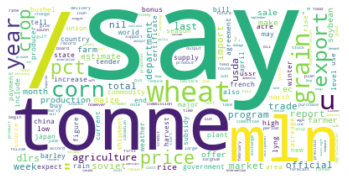

In [ ]:
nltk.download('reuters')
nltk.download('stopwords')

from nltk.corpus import reuters, stopwords
from nltk import FreqDist

grain_tok = [ reuters.words(f) for f in reuters.fileids('grain') ]
grain_pos = [ pos_tag(t) for t in grain_tok ]
grain_lem = [lemmaNVAR(pos) for pos in grain_pos ]

stop = stopwords.words('english')+['could', 'would']

grain_flat = [ c for l in grain_lem for c in l ]
grain_clean = [ w for w in grain_flat if w not in stop ]

fd_grain = FreqDist(grain_clean)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()




In [ ]:
fd_grain.most_common(30)

[('say', 1867),
 ('/', 1242),
 ('tonne', 1229),
 ('mln', 1073),
 ('wheat', 1010),
 ('u', 909),
 ('grain', 725),
 ('corn', 587),
 ('year', 576),
 ('export', 540),
 ('pct', 472),
 ('"', 453),
 ('price', 431),
 ('crop', 382),
 ('agriculture', 362),
 ('dlrs', 360),
 ('last', 356),
 ('usda', 347),
 ('nil', 312),
 ('department', 303),
 ('market', 293),
 ('trade', 292),
 ('official', 286),
 ('import', 275),
 ('week', 271),
 ('report', 271),
 ('soviet', 269),
 ('total', 251),
 ('program', 249),
 ('production', 233)]

In [ ]:
pos_tag(word_tokenize("I like apple / orange."))

[('I', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('/', 'NNP'),
 ('orange', 'NN'),
 ('.', '.')]